In [29]:
import pandas as pd
df = pd.read_csv("data.csv", encoding='unicode_escape')



In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Recency


In [35]:
df['Date']=pd.to_datetime(df['InvoiceDate'])
df['rank'] = df.sort_values(['CustomerID', 'Date']) \
               .groupby(['CustomerID'])['Date'] \
               .rank(method='min') \
               .fillna(0).astype(int)  # Replace NaN with 0 before converting to int

df_rec=df[df['rank']==1]
df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days

C:\Users\Hp\AppData\Local\Temp\ipykernel_14252\538584606.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days


In [36]:
df_rec.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0


## Frequency


In [37]:
freq=df_rec.groupby('CustomerID')['Date'].count()
df_freq=pd.DataFrame(freq).reset_index()
df_freq.columns=['CustomerID','Frequency']
rec_freq=df_freq.merge(df_rec,on='CustomerID')

In [38]:
rec_freq.head()

,CustomerID,Frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,rank,recency
0,12346.0,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,1,48
1,12347.0,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,1,6
2,12347.0,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,1,6
3,12347.0,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,1,6
4,12347.0,31,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,1,6


## Monetary value

In [40]:
rec_freq['Total']=df['Quantity']*df['UnitPrice']
mon=rec_freq.groupby('CustomerID')['Total'].sum()
df_mon=pd.DataFrame(mon).reset_index()
df_mon.columns=['CustomerID','Monetary value']
rec_freq_mon=df_mon.merge(rec_freq,on='CustomerID')

In [41]:
rec_freq_mon.head()

,CustomerID,Monetary value,Frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,rank,recency,Total
0,12346.0,15.30,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,1,48,15.30
1,12347.0,804.25,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,1,6,20.34
2,12347.0,804.25,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,1,6,22.00
3,12347.0,804.25,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,1,6,20.34
4,12347.0,804.25,31,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,1,6,20.34


In [43]:
finaldf=rec_freq_mon[['CustomerID','recency','Frequency','Monetary value']]

In [46]:
finaldf.tail(20)

,CustomerID,recency,Frequency,Monetary value
100790,18287.0,172,29,127.11
100791,18287.0,172,29,127.11
100792,18287.0,172,29,127.11
100793,18287.0,172,29,127.11
100794,18287.0,172,29,127.11
100795,18287.0,172,29,127.11
100796,18287.0,172,29,127.11
100797,18287.0,172,29,127.11
100798,18287.0,172,29,127.11
100799,18287.0,172,29,127.11


## Identifying Outliers


recency:


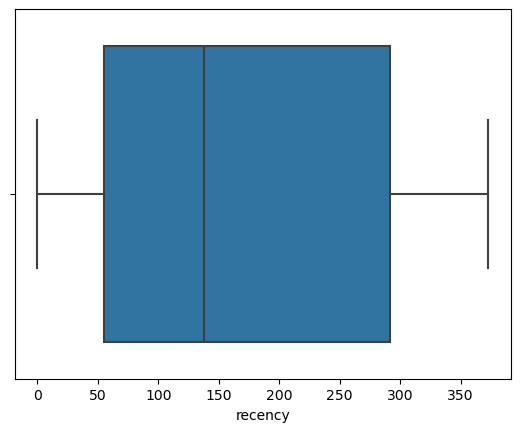

Frequency:


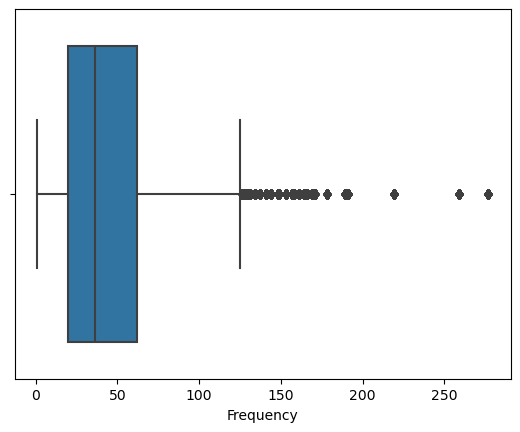

Monetary value:


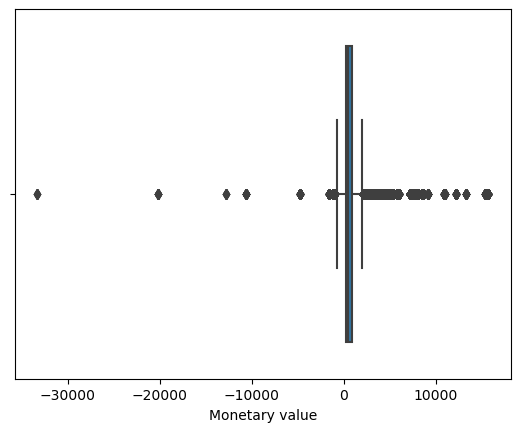

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
list=['recency','Frequency','Monetary value']
for i in list:
    print(str(i)+':')
    ax=sns.boxplot(x=finaldf[str(i)])
    plt.show()
    

## Removing Outliers

In [67]:
Q1 = new_df.quantile(0.25)  # First quartile (25th percentile)
Q3 = new_df.quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
new_df= new_df[(new_df >= lower_bound) & (new_df <= upper_bound)].dropna()


recency:


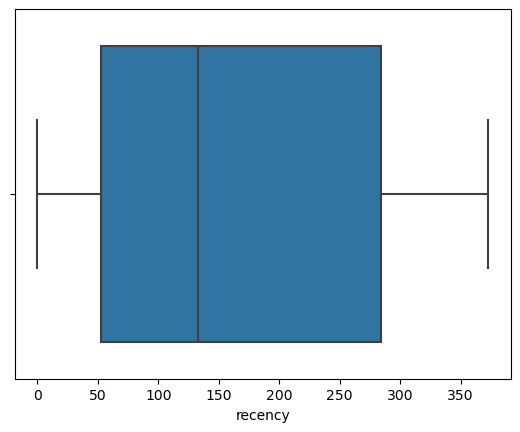

Frequency:


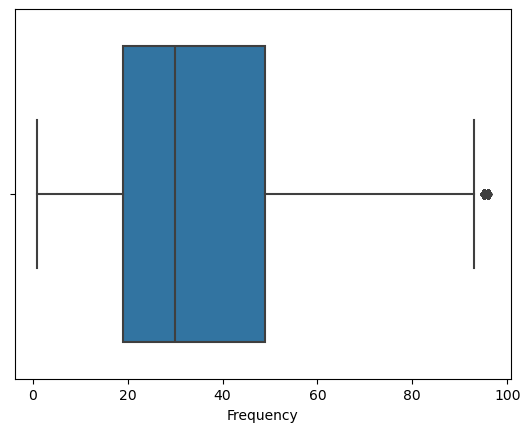

Monetary value:


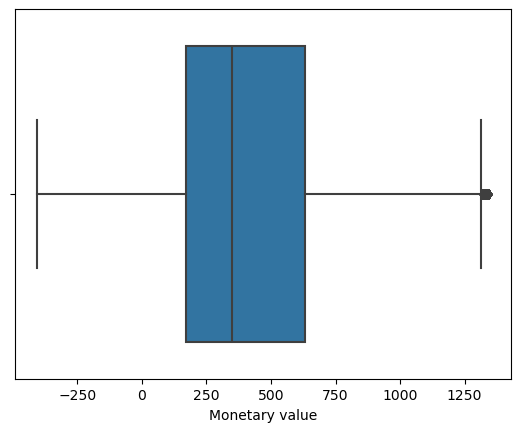

In [68]:
list1=['recency','Frequency','Monetary value']
for i in list1:
    print(str(i)+":")
    ax=sns.boxplot(x=new_df[str(i)])
    plt.show()


## Standardization

In [73]:
from sklearn.preprocessing import StandardScaler
new_df=new_df.drop_duplicates()
cols=['recency','Frequency','Monetary value']
features=new_df[cols]
scaler = StandardScaler().fit(features.values)
features=scaler.transform(features.values)

In [74]:
scaled_features=pd.DataFrame(features,columns=cols)

In [75]:
scaled_features.head()

,recency,Frequency,Monetary value
0,-0.853481,-1.278231,-1.002484
1,-1.209758,0.503196,1.766496
2,-1.133413,-0.328137,1.718097
3,-0.726239,-0.328137,-0.732062
4,-0.607479,-0.446899,0.729413


In [87]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans=KMeans(n_clusters=4,init='k-means++')
kmeans.fit(scaled_features)

C:\Users\Hp\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [88]:
print(silhouette_score(scaled_features,kmeans.labels_,metric='euclidean'))

0.37936511268519046


In [89]:
pred=kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred

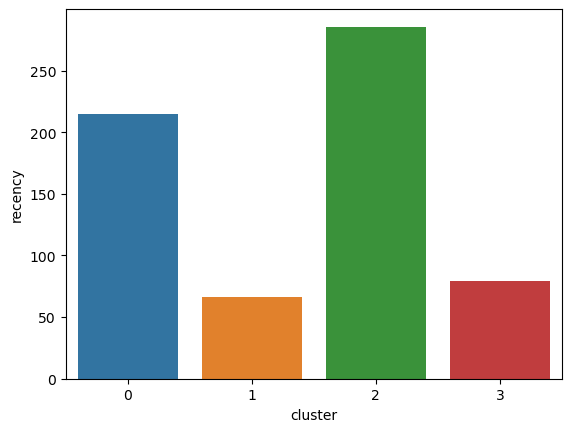

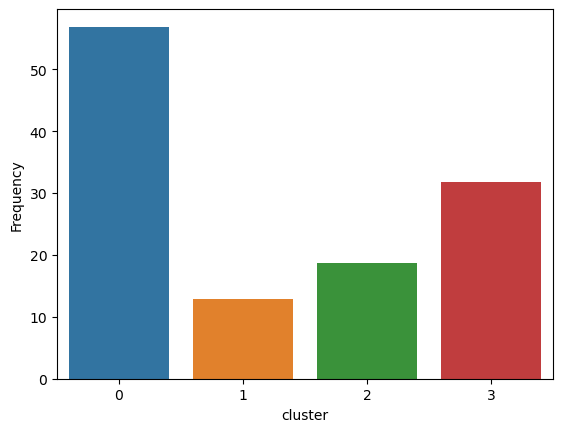

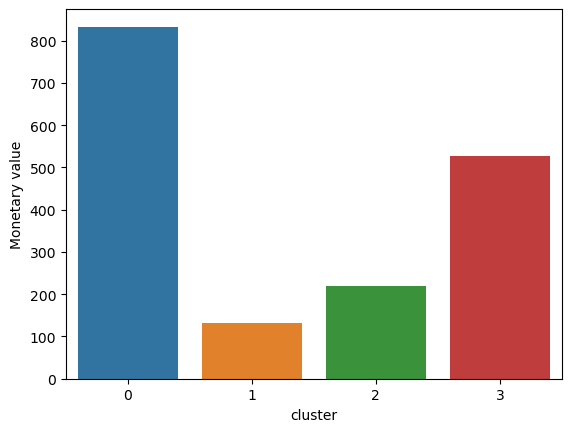

In [90]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()